<a href="https://colab.research.google.com/github/backblaz/DataScience-Exercise/blob/main/NFL_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def display_dataframe_to_user(name, dataframe):
  """Displays the dataframe with the given name."""
  print(f"{name}:\n")
  display(dataframe)


In [ ]:
df_nfl = pd.read_csv("/content/season_2021_nfl.csv")
df_nfl.head()

,team_name,week,day,date,result,opponent,tm_score,opp_score,1stD_offense,TotYd_offense,PassY_offense,RushY_offense,TO_offense,1stD_defense,TotYd_defense,PassY_defense,RushY_defense,TO_defense
0,Arizona Cardinals,1,Sun,September 12,W,Tennessee Titans,38,13,22,416,280,136,1,17,248,162,86,3
1,Arizona Cardinals,2,Sun,September 19,W,Minnesota Vikings,34,33,21,474,371,103,2,22,419,242,177,0
2,Arizona Cardinals,3,Sun,September 26,W,Jacksonville Jaguars,31,19,23,407,316,91,1,20,361,202,159,4
3,Arizona Cardinals,4,Sun,October 3,W,Los Angeles Rams,37,20,27,465,249,216,0,24,401,280,121,2
4,Arizona Cardinals,5,Sun,October 10,W,San Francisco 49ers,17,10,20,304,210,94,1,19,338,186,152,1


Team Performance Rankings:



,team_name,Avg_Points_Scored,Avg_Total_Yards_Offense,Avg_Passing_Yards,Avg_Rushing_Yards,Avg_Turnovers_Lost,Avg_Points_Allowed,Avg_Total_Yards_Allowed,Avg_Passing_Yards_Allowed,Avg_Rushing_Yards_Allowed,Avg_Turnovers_Forced
0,Arizona Cardinals,25.555556,363.055556,244.333333,118.722222,0.944444,22.222222,331.777778,215.555556,116.222222,1.500000
1,Atlanta Falcons,18.411765,303.764706,218.411765,85.352941,1.529412,27.000000,364.352941,232.470588,131.882353,1.176471
2,Baltimore Ravens,22.764706,378.823529,233.000000,145.823529,1.529412,23.058824,363.411765,278.941176,84.470588,0.882353
3,Buffalo Bills,29.789474,389.315789,258.157895,131.157895,1.157895,18.315789,289.157895,176.684211,112.473684,1.684211
4,Carolina Panthers,17.882353,298.882353,190.529412,108.352941,1.705882,23.764706,305.941176,192.117647,113.823529,0.941176
5,Chicago Bears,18.294118,307.352941,188.647059,118.705882,1.705882,23.941176,316.705882,191.588235,125.117647,0.941176
6,Cincinnati Bengals,26.285714,355.333333,256.047619,99.285714,1.095238,21.809524,351.904762,248.714286,103.190476,1.428571
7,Cleveland Browns,20.529412,340.647059,195.294118,145.352941,1.294118,21.823529,311.529412,202.294118,109.235294,1.117647
8,Dallas Cowboys,30.388889,401.444444,279.444444,122.000000,1.166667,21.166667,350.444444,234.500000,115.944444,1.944444
9,Denver Broncos,19.705882,330.470588,211.352941,119.117647,1.058824,18.941176,326.117647,214.823529,111.294118,1.117647


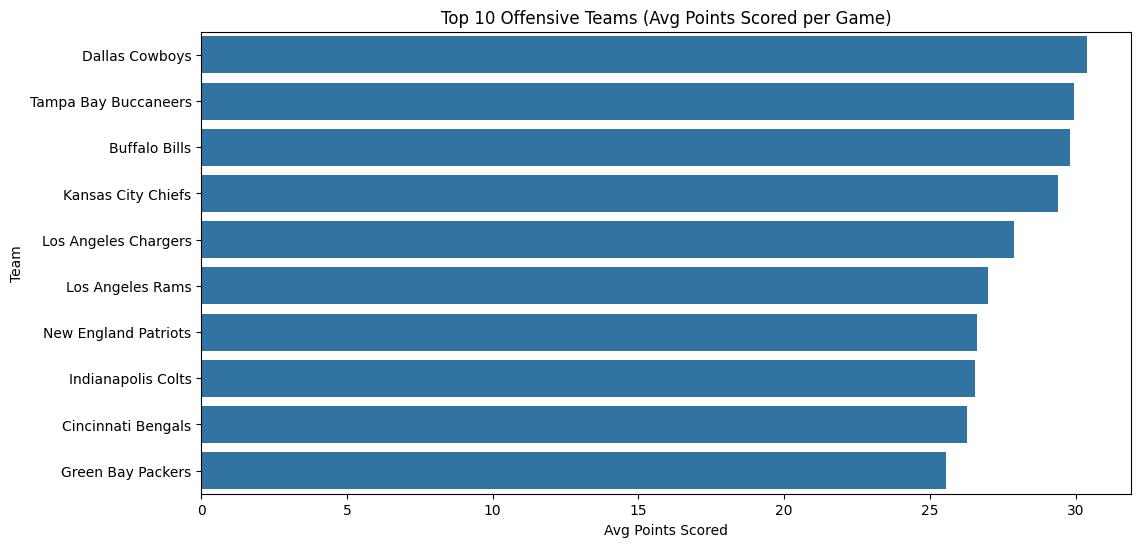

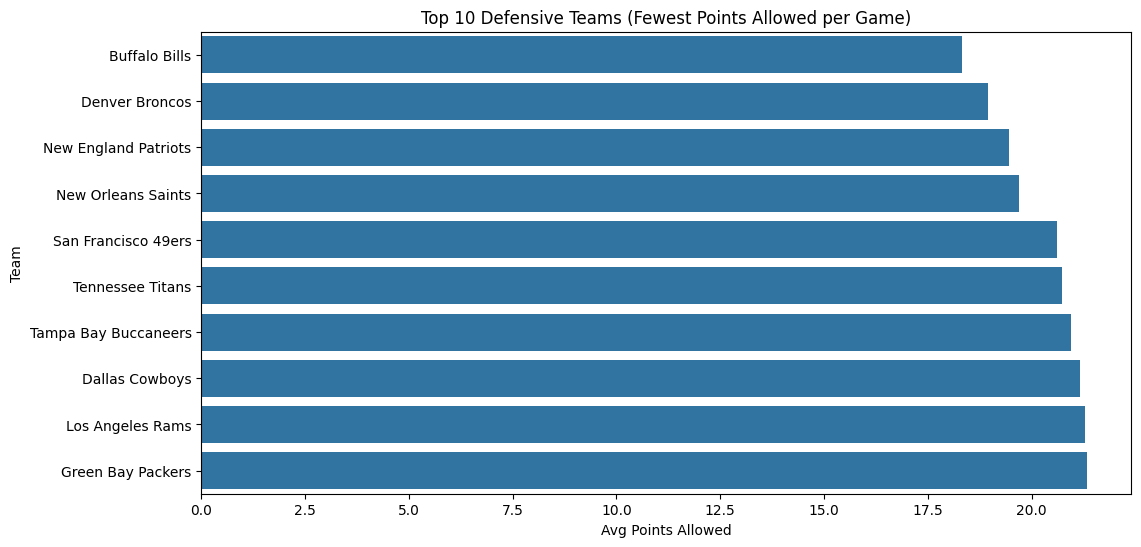

In [ ]:
# Group by team and calculate average offensive & defensive stats per game
team_stats = df_nfl.groupby("team_name").agg({
    "tm_score": "mean",
    "TotYd_offense": "mean",
    "PassY_offense": "mean",
    "RushY_offense": "mean",
    "TO_offense": "mean",
    "opp_score": "mean",
    "TotYd_defense": "mean",
    "PassY_defense": "mean",
    "RushY_defense": "mean",
    "TO_defense": "mean"
}).reset_index()

# Rename columns for clarity
team_stats.rename(columns={
    "tm_score": "Avg_Points_Scored",
    "TotYd_offense": "Avg_Total_Yards_Offense",
    "PassY_offense": "Avg_Passing_Yards",
    "RushY_offense": "Avg_Rushing_Yards",
    "TO_offense": "Avg_Turnovers_Lost",
    "opp_score": "Avg_Points_Allowed",
    "TotYd_defense": "Avg_Total_Yards_Allowed",
    "PassY_defense": "Avg_Passing_Yards_Allowed",
    "RushY_defense": "Avg_Rushing_Yards_Allowed",
    "TO_defense": "Avg_Turnovers_Forced"
}, inplace=True)

# Display team performance rankings
display_dataframe_to_user(name="Team Performance Rankings", dataframe=team_stats)

# Visualization: Top 10 Teams by Avg Points Scored
plt.figure(figsize=(12, 6))
top_offense = team_stats.sort_values(by="Avg_Points_Scored", ascending=False).head(10)
sns.barplot(y=top_offense["team_name"], x=top_offense["Avg_Points_Scored"])
plt.title("Top 10 Offensive Teams (Avg Points Scored per Game)")
plt.xlabel("Avg Points Scored")
plt.ylabel("Team")
plt.show()

# Visualization: Top 10 Teams by Avg Points Allowed (Best Defense)
plt.figure(figsize=(12, 6))
top_defense = team_stats.sort_values(by="Avg_Points_Allowed", ascending=True).head(10)
sns.barplot(y=top_defense["team_name"], x=top_defense["Avg_Points_Allowed"])
plt.title("Top 10 Defensive Teams (Fewest Points Allowed per Game)")
plt.xlabel("Avg Points Allowed")
plt.ylabel("Team")
plt.show()


Model Accuracy: 0.9561

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        61
           1       0.96      0.94      0.95        53

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



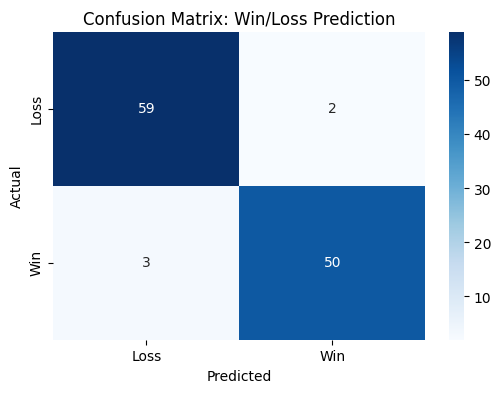

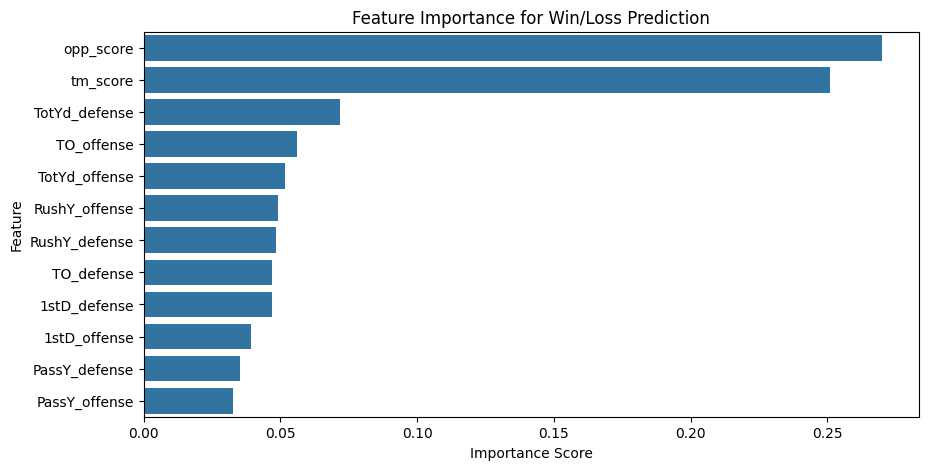

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert "result" column into binary (Win = 1, Loss = 0)
df_nfl["result"] = df_nfl["result"].apply(lambda x: 1 if x == "W" else 0)

# Define features (X) and target (y)
features = [
    "tm_score", "1stD_offense", "TotYd_offense", "PassY_offense", "RushY_offense", "TO_offense",
    "opp_score", "1stD_defense", "TotYd_defense", "PassY_defense", "RushY_defense", "TO_defense"
]
X = df_nfl[features]
y = df_nfl["result"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Predictions
y_pred = rf_model.predict(X_test)

# Model Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["Loss", "Win"], yticklabels=["Loss", "Win"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Win/Loss Prediction")
plt.show()

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance for Win/Loss Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Win Correlation Analysis:



,result
result,1.000000
tm_score,0.587349
TO_defense,0.397526
TotYd_offense,0.348350
1stD_offense,0.333211
RushY_offense,0.327168
PassY_offense,0.173241
PassY_defense,-0.166948
1stD_defense,-0.332095
RushY_defense,-0.337524


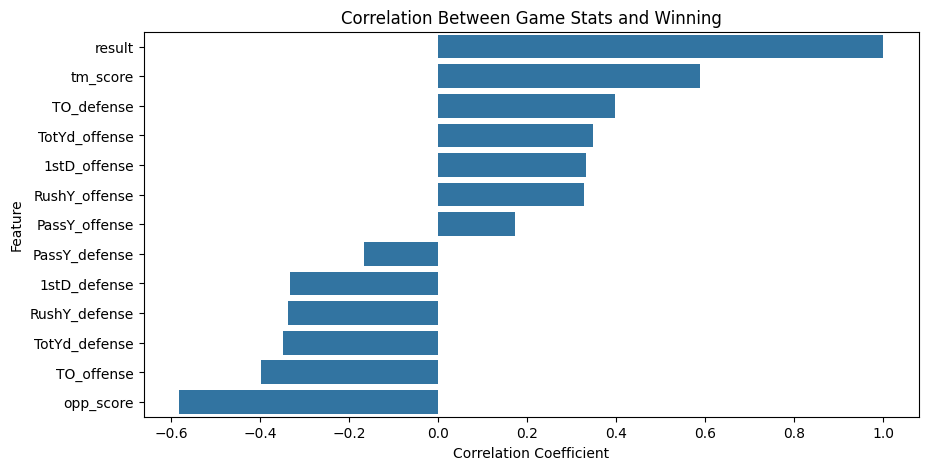

In [ ]:
# Compute correlation matrix
correlation_matrix = df_nfl[features + ["result"]].corr()

# Extract correlation with "result" (Win/Loss)
win_correlation = correlation_matrix["result"].sort_values(ascending=False)

# Display the correlation table
display_dataframe_to_user(name="Win Correlation Analysis", dataframe=win_correlation.to_frame()) # Changed this line

# Visualizing Correlation with Winning
plt.figure(figsize=(10, 5))
sns.barplot(x=win_correlation.values, y=win_correlation.index)
plt.title("Correlation Between Game Stats and Winning")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

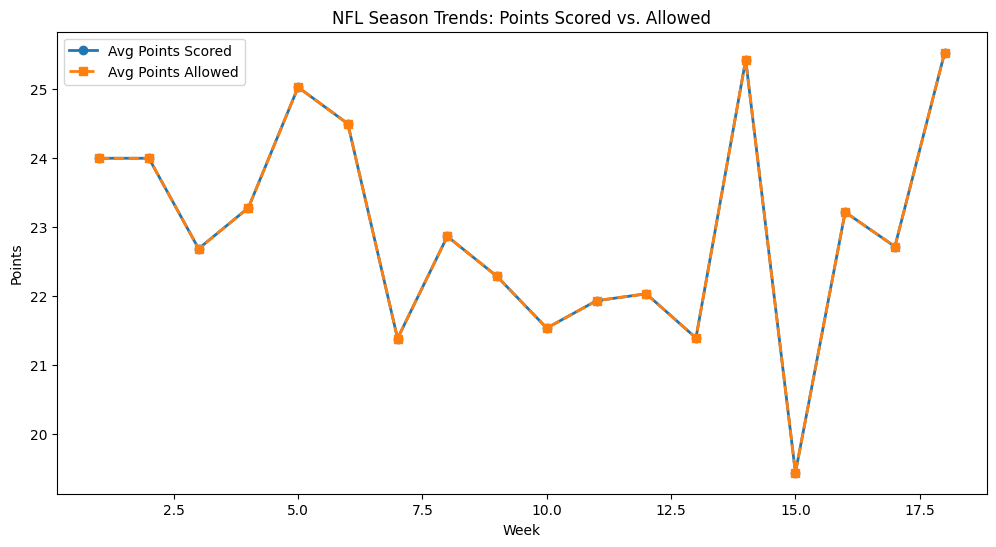

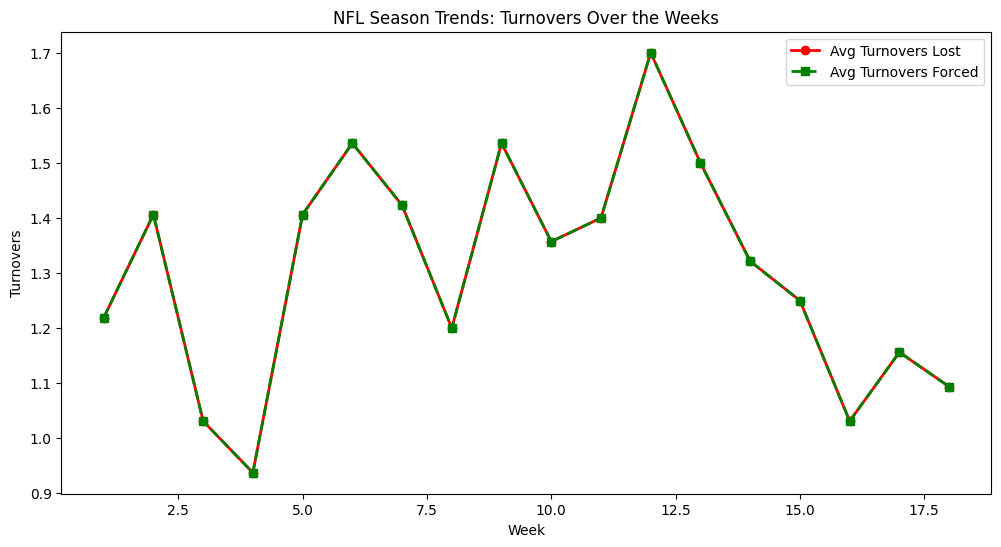

In [ ]:
# Aggregate data by week to analyze overall league trends
weekly_trends = df_nfl.groupby("week").agg({
    "tm_score": "mean",
    "TotYd_offense": "mean",
    "TO_offense": "mean",
    "opp_score": "mean",
    "TotYd_defense": "mean",
    "TO_defense": "mean"
}).reset_index()

# Convert "week" to numeric for proper sorting
weekly_trends["week"] = pd.to_numeric(weekly_trends["week"], errors="coerce")

# Sort by week
weekly_trends = weekly_trends.sort_values(by="week")

# Visualization: Points Scored vs. Allowed Over the Season
plt.figure(figsize=(12, 6))
plt.plot(weekly_trends["week"], weekly_trends["tm_score"], marker="o", label="Avg Points Scored", linestyle='-', linewidth=2)
plt.plot(weekly_trends["week"], weekly_trends["opp_score"], marker="s", label="Avg Points Allowed", linestyle='--', linewidth=2)
plt.title("NFL Season Trends: Points Scored vs. Allowed")
plt.xlabel("Week")
plt.ylabel("Points")
plt.legend()
plt.show()

# Visualization: Turnovers Over the Season
plt.figure(figsize=(12, 6))
plt.plot(weekly_trends["week"], weekly_trends["TO_offense"], marker="o", label="Avg Turnovers Lost", linestyle='-', linewidth=2, color="red")
plt.plot(weekly_trends["week"], weekly_trends["TO_defense"], marker="s", label="Avg Turnovers Forced", linestyle='--', linewidth=2, color="green")
plt.title("NFL Season Trends: Turnovers Over the Weeks")
plt.xlabel("Week")
plt.ylabel("Turnovers")
plt.legend()
plt.show()


NFL Team Power Rankings:



,team_name,tm_score,opp_score,TotYd_offense,TotYd_defense,TO_offense,TO_defense,Offensive_Strength,Defensive_Strength,Turnover_Differential,Power_Score,Rank
0,Buffalo Bills,29.789474,18.315789,389.315789,289.157895,1.157895,1.684211,33.682632,21.207368,0.526316,13.527895,1
1,Dallas Cowboys,30.388889,21.166667,401.444444,350.444444,1.166667,1.944444,34.403333,24.671111,0.777778,11.287778,2
2,Tampa Bay Buccaneers,29.947368,20.947368,400.473684,336.947368,1.105263,1.894737,33.952105,24.316842,0.789474,11.214211,3
3,New England Patriots,26.611111,19.444444,350.722222,320.333333,1.388889,1.666667,30.118333,22.647778,0.277778,8.026111,4
4,Kansas City Chiefs,29.400000,22.400000,407.550000,365.500000,1.450000,1.550000,33.475500,26.055000,0.100000,7.620500,5
5,Indianapolis Colts,26.529412,21.470588,347.117647,343.176471,1.117647,1.941176,30.000588,24.902353,0.823529,6.745294,6
6,Los Angeles Rams,27.000000,21.285714,373.190476,332.952381,1.428571,1.428571,30.731905,24.615238,0.000000,6.116667,7
7,Green Bay Packers,25.555556,21.333333,359.888889,321.722222,0.777778,1.500000,29.154444,24.550556,0.722222,6.048333,8
8,Cincinnati Bengals,26.285714,21.809524,355.333333,351.904762,1.095238,1.428571,29.839048,25.328571,0.333333,5.177143,9
9,Arizona Cardinals,25.555556,22.222222,363.055556,331.777778,0.944444,1.500000,29.186111,25.540000,0.555556,4.757222,10


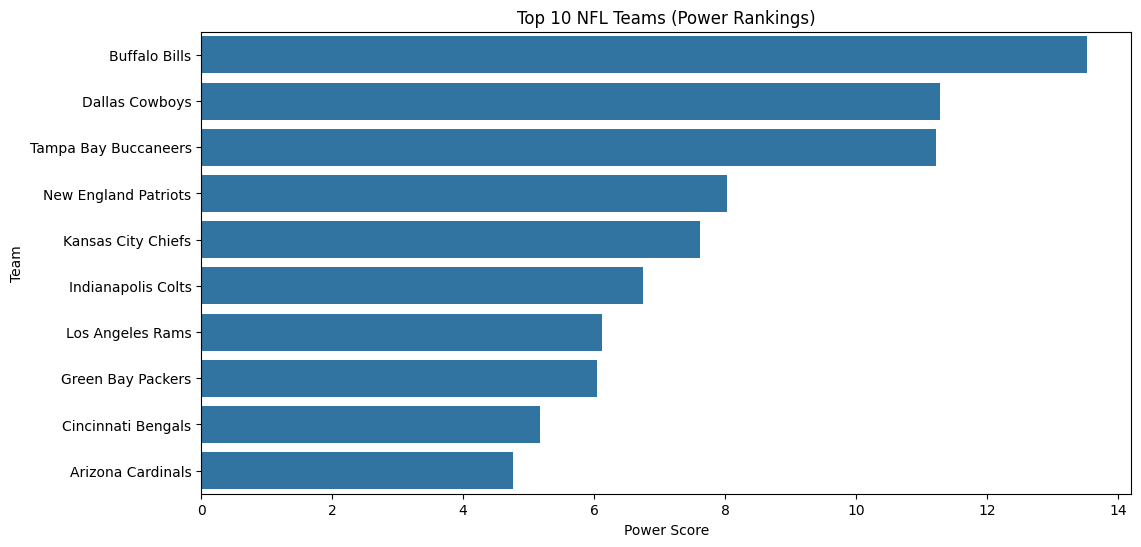

In [ ]:
# Step 1: Aggregate Team Performance Stats
team_rankings = df_nfl.groupby("team_name").agg({
    "tm_score": "mean",  # Avg Points Scored (Offensive Strength)
    "opp_score": "mean",  # Avg Points Allowed (Defensive Weakness)
    "TotYd_offense": "mean",  # Avg Total Yards (Offense)
    "TotYd_defense": "mean",  # Avg Total Yards Allowed (Defense)
    "TO_offense": "mean",  # Turnovers Lost (Bad for Offense)
    "TO_defense": "mean"   # Turnovers Forced (Good for Defense)
}).reset_index()

# Step 2: Compute Power Score Components
team_rankings["Offensive_Strength"] = team_rankings["tm_score"] + (team_rankings["TotYd_offense"] / 100)
team_rankings["Defensive_Strength"] = team_rankings["opp_score"] + (team_rankings["TotYd_defense"] / 100)
team_rankings["Turnover_Differential"] = team_rankings["TO_defense"] - team_rankings["TO_offense"]

# Step 3: Compute Final Power Score
team_rankings["Power_Score"] = (
    team_rankings["Offensive_Strength"] - team_rankings["Defensive_Strength"]
    + team_rankings["Turnover_Differential"] * 2
)

# Step 4: Rank Teams
team_rankings = team_rankings.sort_values(by="Power_Score", ascending=False).reset_index(drop=True)
team_rankings["Rank"] = np.arange(1, len(team_rankings) + 1)

# Display Power Rankings
# tools.display_dataframe_to_user(name="NFL Team Power Rankings", dataframe=team_rankings)
display_dataframe_to_user(name="NFL Team Power Rankings", dataframe=team_rankings)

# Step 5: Visualize Top 10 Teams
plt.figure(figsize=(12, 6))
top_10_teams = team_rankings.head(10)
sns.barplot(y=top_10_teams["team_name"], x=top_10_teams["Power_Score"])
plt.title("Top 10 NFL Teams (Power Rankings)")
plt.xlabel("Power Score")
plt.ylabel("Team")
plt.show()